# Estimating the number of phages in subseafloor sediments
To estimate the total number of phages in subseafloor sediments, we rely on two recent papers which measured the ratio between the number of prokaryotes in subseafloor sediments and the number of phage like particles ([Engelhardt et al.](http://dx.doi.org/10.1038/ismej.2013.245) and [Middelboe et al.](https://doi.org/10.3354/ame01485). We extracted the data from figure 3 of Engelhardt et al. and from figure 2 of Middelboe et al.:

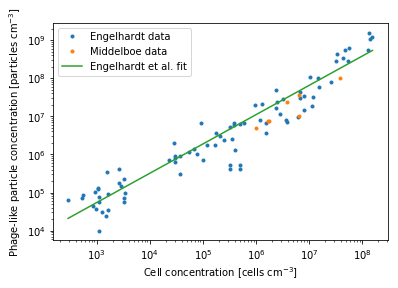

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../../../statistics_helper')
from CI_helper import *

# Load data extracted from Engelhardt et al.
data = pd.read_excel('marine_deep_subsurface_phage_data.xlsx',skiprows=1)

# Load data extracted from Middelboe et al.
middelboe = pd.read_excel('marine_deep_subsurface_phage_data.xlsx','Middelboe',skiprows=1,index_col=0)

# Plot the data
plt.loglog(data['Cells concentration [cells cm^-3]'],data['Phage concentration [virions cm^-3]'],'.',label='Engelhardt data')
plt.loglog(middelboe['Prokaryote abundance [cm^-3]'],middelboe['Viral abundance [cm^-3]'],'.',label='Middelboe data')

# Plot the fit Engelhardt et al. used for the data
fit_xdata = 10**np.linspace(np.log10(data['Cells concentration [cells cm^-3]'].min()),np.log10(data['Cells concentration [cells cm^-3]'].max()),100)
plt.loglog(fit_xdata,271.8*fit_xdata**0.768,label='Engelhardt et al. fit')
plt.xlabel(r'Cell concentration [cells cm$^{-3}$]')
plt.ylabel(r'Phage-like particle concentration [particles cm$^{-3}$]')
plt.legend()

As the data from the two studies seem to correspond well to the same fit used in Engelhardt et al., we combined the data from the two studies and calculate the geometic mean of the ratios between phage-like particles and prokaryotes across measurements in Engelhardt et al.:

In [2]:
# Merge data from Engelhardt et al. and Middelboe et al.
merged_data = pd.concat([(data['Phage concentration [virions cm^-3]']/data['Cells concentration [cells cm^-3]']),(middelboe['Viral abundance [cm^-3]']/middelboe['Prokaryote abundance [cm^-3]'])])
geo_mean_ratio = gmean(merged_data)
print('Our best estimate for the ratio between the concentration of phage-like particles and cells in subseafloor sediments is ≈%.0f.' %geo_mean_ratio)

Our best estimate for the ratio between the concentration of phage-like particles and cells in subseafloor sediments is ≈12.


To calculate the total number of phages in subseafloor sediments, we multiply the ratio of phage-like particles to prokaryotes by our estimate for the total number of prokaryotes in subseafloor sediments.

In [3]:
prokaryote_estimate = pd.read_excel('../../../bacteria_archaea/marine_deep_subsurface/marine_deep_subsurface_prok_biomass_estimate.xlsx')
best_estimate = prokaryote_estimate.loc[0]['Value']*geo_mean_ratio
print('Our best estimate for the total number of phages in subseafloor sediments is ≈%.0e' %best_estimate)

old_results = pd.read_excel('../phage_num_estimate.xlsx')
result = old_results.copy()
result.loc[1] = pd.Series({
                'Parameter': 'Total number of phages in the marine deep subsurface',
                'Value': best_estimate,
                'Units': 'Number of individuals',
                'Uncertainty': np.nan
                })

result.to_excel('../phage_num_estimate.xlsx',index=False)


Our best estimate for the total number of phages in subseafloor sediments is ≈5e+30
